### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: December 8, 6pm**
<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team has now equipped with all the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.


# Background about Elevator Pitch (90 seconds) and Shark Tank

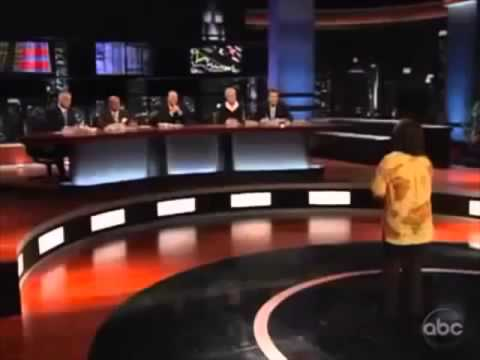

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("mrSmaCo29U4") 

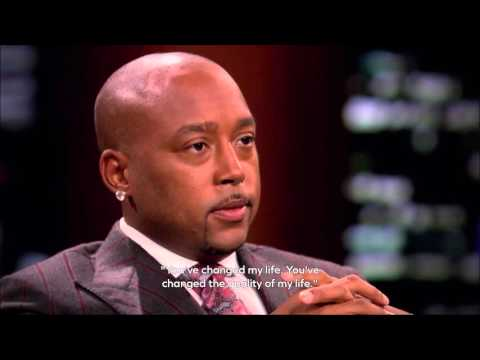

In [2]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Too good to be true. Spot deceptive positive restaurants reviews in Yelp.

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

## remove 
Human beings are lousy at identifying deceptive reviews

humans suffer from a "truth bias," assuming that what they are reading is true until they find evidence to the contrary.


**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:




2) Math Solution:






3) Implementation of the Solution


In [8]:
# your code here

# Not a simple outlier detection problem. 
# outliers detector will filter out truthful reviews while could be labeled as "outliers" because they are from recent users, new businesses 



### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [14]:
# Global Import
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from IPython.display import HTML
from datetime import datetime, date, time
from sklearn.svm import LinearSVC
import re

import json
%matplotlib inline


In [9]:
dataset = load_files('restaurants', encoding='utf-8', decode_error='replace',shuffle=False)
dataset_df = pd.DataFrame(dataset.data)

** Extract features **

Some online reviews are too good to be true; Cornell computers spot 'opinion spam'
http://bit.ly/2g6ou9X 

according to the article above, "Truth-tellers and deceivers differ in the use of keywords referring to human behavior and personal life, and sometimes in features like the amount of punctuation or frequency of "large words." In parallel with previous analysis of imaginative vs. informative writing, deceivers use more verbs and truth-tellers use more nouns."

Featuers to extract from the text - use in the text classification part.:

* amount of punctuation

* total verbs  - total nouns

* length of the review.

Featuers to extract from the meta-data - use for the anomaly detection step:

* user_review_count
* user_average_stars
* user_Votes
* user_Friends_count
* Business_rate
* Business_review_count


In [60]:
from string import punctuation
import nltk

def extract_content_based_features(input_data): 
    length = [len(data) for data in input_data]
    tokens = [nltk.word_tokenize(data) for data in input_data]
    taggeds = [nltk.pos_tag(token,tagset='universal') for token in tokens] 
    tag_fds = [nltk.FreqDist(tag for (word, tag) in tagged) for tagged in taggeds]
    verb_minus_noun = [tag_fd['VERB'] - tag_fd['NOUN'] for tag_fd in tag_fds]
    punctuation_amount = [len(re.findall('['+punctuation+']', data)) for data in input_data]
    features = {'punctuation_amount': punctuation_amount,'verb_minus_noun': verb_minus_noun}
    return pd.DataFrame(features)

def extract_ngram_1_3_features(tfidVect,input_data):
    XInput = TfidfVect.transform(input_data).toarray()
    return pd.DataFrame(XInput)

def extract_features(tfidVect, input_data):
    df1= extract_content_based_features(input_data)
    df2= extract_ngram_1_3_features(tfidVect,input_data)
    ## extract_ngram (1 3) features
    result = pd.concat([df1, df2], axis=1, join='inner')
    return result

In [44]:
# define the TfidfVect. 
min_df=3
max_df=0.96
# ngram (1,3) gives better percsion than 1,2 and 1,4 doesn't improve accuracy. 
ngram_range = (1,3) 
TfidfVect= TfidfVectorizer(min_df = min_df, max_df = max_df, ngram_range = ngram_range)

**Classification Report**

             precision    recall  f1-score   support

  deceptive       0.90      0.78      0.84        23
   truthful       0.76      0.89      0.82        18

avg / total       0.84      0.83      0.83        41

**Confusion Matrix**

[[18  5]
 [ 2 16]]


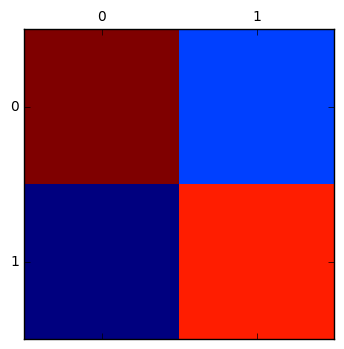

In [62]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.10, random_state=None)

TfidfVect.fit(docs_train)
# define featuers from yelp user/business meta-data. 

Xtrain=extract_features(TfidfVect, docs_train)
Xtest=extract_features(TfidfVect, docs_test)
clf  = LinearSVC(C=100)
clf.fit(Xtrain, y_train)
y_predicted = clf.predict(Xtest)

print("**Classification Report**\n")
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))
print("**Confusion Matrix**\n")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()

** Load yelp data, train the anomaly detection step**

In [63]:
reviews_file = 'mass_yelp_academic_dataset_resturants_reviews.json' 
business_file = 'mass_yelp_academic_dataset_resturants_business.json'
user_file = 'yelp_academic_dataset_user.json'

reviews_df = pd.DataFrame([json.loads(line) for line in open(reviews_file)])
business_df =  pd.DataFrame([json.loads(line) for line in open(business_file)])
user_df =  pd.DataFrame([json.loads(line) for line in open(business_file)])

## Implement 2 versions of anomly detection: 

1) first one is based only on content - choose novelty algorithm and fit it with positive data only

2) Second works for Yelp resturants, fit it with yelp data. extract featuers from yelp users and yelp business datasets.

In [8]:
# 1nd Novelty based using OneClassSVM
from sklearn.svm import OneClassSVM
# combine all extractd featuers in one data frame
target_truthful = 1

anomly_detector_text_based = OneClassSVM()
dataset_df = define_content_only_features(dataset.data)


x_truthful_traning = dataset_df[dataset.target==target_truthful]
docs_train_1, docs_test_1 = train_test_split(x_truthful_traning, test_size=0.10, random_state=None)

anomly_detector_text_based.fit(docs_train_1)

NameError: name 're' is not defined

In [ ]:

def define_all_features(input_data):
    text_only_featuers = define_content_only_features(input_data)
    # define featuers from yelp user/business meta-data. 

In [ ]:
# 2nd - Outlier detector using EllipticEnvelope
from sklearn.covariance import EllipticEnvelope

df = define_features(dataset.data)
anomly_detector = EllipticEnvelope(contamination=0.15)

#ad_docs_train, ad_docs_test = train_test_split(df, test_size=0.10, random_state=None)
anomly_detector.fit(df)


**implements 2 steps detector**

In [ ]:
def predictor(input_data):
    f = define_features(input_data)
    ad_result = anomly_detector.predict(f)
    X_vect = TfidfVect.transform(input_data).toarray()
    clf_result = clf.predict(X_vect)
    # return the clf result if anomly return true otherwise cosider it truthful.
    result=[cf if (ad== True) else 1 for cf,ad in zip(clf_result,ad_result)]
    return result


In [ ]:
import requests
url = 'http://yousef.fadila.net/review-checker/'
payload = {'review_text': 'it was crowded . but we enjoy the place '}

r = requests.post(url, data=payload)
r.text

In [ ]:
import requests
url = 'http://yousef.fadila.net/review-checker/'
payload = {'review_text': 'This is the best experience ever, everything was perfect'}

r = requests.post(url, data=payload)
r.text

*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 4-TEAM NUMBER ???".